In [1]:
import torch
import torchvision
from alae import ALAE
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda:0")

In [2]:
mnist_train = torchvision.datasets.MNIST(
    '/files/',
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
    ])
)

mnist_test = torchvision.datasets.MNIST(
    '/files/',
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
    ])
)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True)

In [3]:
alae = ALAE().to(device)

In [4]:
alae.train()
train_hist, test_hist = alae.fit(train_loader, test_loader, epochs = 10)
alae.eval()
print('done')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [07:23<00:00, 44.40s/it]

done


In [5]:
idx = 1
_, (img_tensors, target) = next(enumerate(test_loader))
img_tensor = img_tensors[idx: idx + 1].to(device)
latent = alae.e(img_tensor)
gen_img = alae.g(latent.reshape(1, 8, 2, 2)).detach().cpu().numpy()

In [6]:
gen_img.shape

(1, 1, 28, 28)

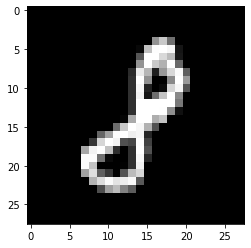

In [7]:
plt.imshow(np.clip(img_tensors[idx: idx + 1], 0, 1)[0][0], cmap='gray')

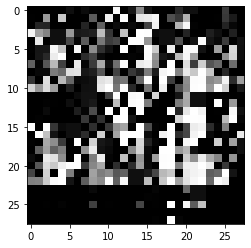

In [8]:
plt.imshow(np.clip(gen_img[0][0], 0, 1), cmap='gray')

In [9]:
torch.save(alae.state_dict(), './test.pt')

In [10]:
idxA, idxB = 2, 5
_, (img_tensors, target) = next(enumerate(test_loader))
img_tensorA = img_tensors[idxA: idxA + 1].to(device)
latentA = alae.e(img_tensorA)
img_tensorB = img_tensors[idxB: idxB + 1].to(device)
latentB = alae.e(img_tensorB)

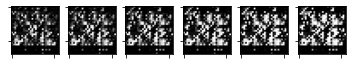

In [11]:
num = 5
delta = (latentB - latentA) / num
fig, axs = plt.subplots(1, num + 1)

latent = latentA.clone()
for i in range(num + 1):
    gen_img = alae.g(latent.reshape(1, 8, 2, 2)).detach().cpu().numpy()
    plt.setp(axs[i].get_xticklabels(), visible=False)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].imshow(np.clip(gen_img[0][0], 0, 1), cmap='gray')
    latent += delta

plt.savefig('polymorph', bbox_inches='tight', pad_inches=0)

In [12]:
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


def update(factor):
    latent = latentA.clone()
    image = alae.g(latent.reshape(1, 8, 2, 2) + delta.reshape(1, 8, 2, 2) * factor).detach().cpu().numpy()
    plt.imshow(np.clip(image[0][0], 0, 1), cmap='gray')

interact(update, factor = widgets.FloatSlider(value=0, min=0, max=num + 1, step=1))

interactive(children=(FloatSlider(value=0.0, description='factor', max=6.0, step=1.0), Output()), _dom_classes…

<function __main__.update(factor)>